In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
sample_submit = pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [3]:
sample_submit.head()

,Loan_ID,Loan_Status


In [4]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History',
       u'Property_Area'],
      dtype='object')

In [6]:
train.columns.difference(test.columns)

Index([u'Loan_Status'], dtype='object')

In [7]:
print("train size :",train.shape)
print("test size :",test.shape)

('train size :', (614, 13))
('test size :', (367, 12))


In [8]:
train["source"] = "train"
test["source"] = "test"

In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [11]:
dataf = pd.concat([train,test],axis=0,sort=False)

In [12]:
dataf.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [13]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 80.5+ KB


In [14]:
dataf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
dataf.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
source                 2
dtype: int64

In [16]:
dataf.shape

(981, 14)

In [17]:
import pandas_profiling

In [617]:
##pandas_profiling.ProfileReport(dataf)

In [18]:
dataf.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status', u'source'],
      dtype='object')

In [19]:
dataf.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [20]:
dataf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [21]:
def applymode(x):
    a = x.mode()[0]
    print(a)
    return x.fillna(a)

In [22]:
dataf["Gender"] = dataf.Gender.transform(applymode)

Male


In [23]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [24]:
dataf["Married"]=dataf.Married.transform(applymode)

Yes


In [25]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [26]:
dataf.Dependents = dataf.Dependents.astype(str)

In [29]:
dataf.Dependents=dataf.Dependents.apply( lambda x: x.rstrip('+'))

In [30]:
dataf.Dependents = dataf.Dependents.astype(float)

In [31]:
dataf['Dependents']= dataf.Dependents.transform(lambda x : x.fillna(x.median()))

In [32]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [33]:
dataf["Self_Employed"] = dataf.Self_Employed.transform(applymode)

No


In [34]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [35]:
dataf['LoanAmount']= dataf.LoanAmount.transform(lambda x : x.fillna(x.median()))

In [36]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [37]:
dataf['Loan_Amount_Term']=dataf.Loan_Amount_Term.transform(lambda x : x.fillna(x.median()))

In [38]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [39]:
dataf['Credit_History']=dataf.Credit_History.transform(lambda x : x.fillna(x.median()))

In [40]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [41]:
##dataf=dataf.dropna(how = "any")

In [42]:
dataf.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [43]:
dataf.shape

(981, 14)

In [44]:
dataf.describe(include = ['object'])

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,source
count,981,981,981,981,981,981,614,981
unique,981,2,2,2,2,3,2,2
top,LP002618,Male,Yes,Graduate,No,Semiurban,Y,train
freq,1,799,634,763,862,349,422,614


In [45]:
dataf.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status', u'source'],
      dtype='object')

In [46]:
dataf.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train


In [47]:
##Handling the String data of the Column Loan Status using Label Encoder

In [48]:
dataf["Loan_Status"] = dataf.Loan_Status.map({"Y" : 1,"N":0})

In [49]:
##Handling the String data of the Column Gender using Label Encoder

In [50]:
dataf["Gender"] = dataf.Gender.map({"Male" : 1,"Female":0})

In [51]:
##Handling the String data of the Column Married using Label Encoder

In [52]:
dataf["Married"] = dataf.Married.map({"No" : 0,"Yes":1})

In [53]:
##Handling the String data of the Column Education using Label Encoder

In [54]:
dataf["Education"] = dataf.Education.map({"Graduate" : 1,"Not Graduate":0})

In [55]:
dataf.describe(include = ['object'])

,Loan_ID,Self_Employed,Property_Area,source
count,981,981,981,981
unique,981,2,3,2
top,LP002618,No,Semiurban,train
freq,1,862,349,614


In [56]:
##Handling the String data of the Column Self Employed using Label Encoder

In [57]:
dataf["Self_Employed"] = dataf.Self_Employed.map({"No" : 0,"Yes":1})

In [58]:
##Handling the String data of the Column Property_Area using Label Encoder

In [59]:
dataf['Property_Area']= dataf.Property_Area.map({"Rural" : 0,"Semiurban":1,"Urban":2})

In [60]:
dataf.describe(include = ['object'])

,Loan_ID,source
count,981,981
unique,981,2
top,LP002618,train
freq,1,614


In [61]:
import seaborn as sns

In [62]:
dataf.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.327012,0.139248,-0.040649,0.024719,0.060444,0.082428,0.095866,-0.069058,0.018627,-0.020801,0.017987
Married,0.327012,1.000000,0.344291,-0.026211,0.013666,0.052126,0.061606,0.155463,-0.047505,0.021738,0.006372,0.091478
Dependents,0.139248,0.344291,1.000000,-0.084894,0.026241,0.122136,0.003223,0.149722,-0.084190,-0.045335,0.018639,0.010118
Education,-0.040649,-0.026211,-0.084894,1.000000,0.010848,0.138909,0.060380,0.163174,0.021575,0.062416,0.050685,0.085884
Self_Employed,0.024719,0.013666,0.026241,0.010848,1.000000,0.113106,-0.018861,0.107061,-0.031451,0.034485,-0.059678,-0.003700
ApplicantIncome,0.060444,0.052126,0.122136,0.138909,0.113106,1.000000,-0.114247,0.546241,-0.023823,0.020201,0.005513,-0.004710
CoapplicantIncome,0.082428,0.061606,0.003223,0.060380,-0.018861,-0.114247,1.000000,0.179327,-0.042750,-0.011531,-0.024921,-0.059187
LoanAmount,0.095866,0.155463,0.149722,0.163174,0.107061,0.546241,0.179327,1.000000,0.052775,-0.003005,-0.036888,-0.032864
Loan_Amount_Term,-0.069058,-0.047505,-0.084190,0.021575,-0.031451,-0.023823,-0.042750,0.052775,1.000000,-0.021495,-0.041144,-0.022549
Credit_History,0.018627,0.021738,-0.045335,0.062416,0.034485,0.020201,-0.011531,-0.003005,-0.021495,1.000000,0.024342,0.540556


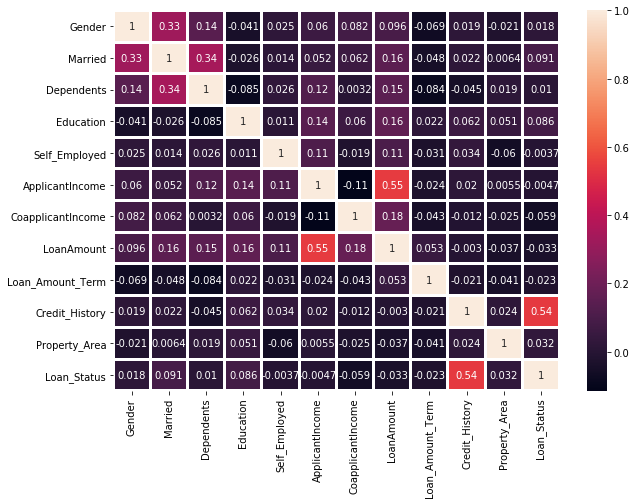

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(dataf.corr(),annot=True,linewidths=2)

In [64]:
##Feature selection based on the correlation

In [65]:
##Credit History , ApplicantIncome,Dependent,Gender,Education

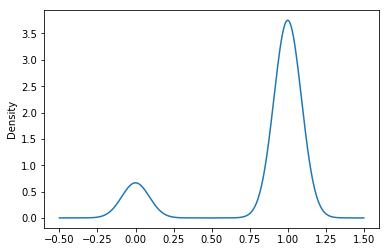

In [66]:
dataf['Credit_History'].plot.density()

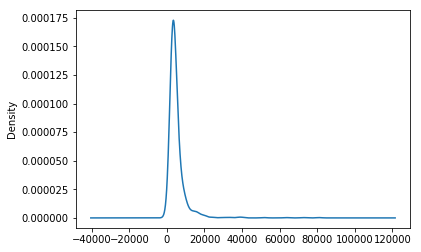

In [67]:
dataf['ApplicantIncome'].plot.density()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DB80870>]],
      dtype=object)

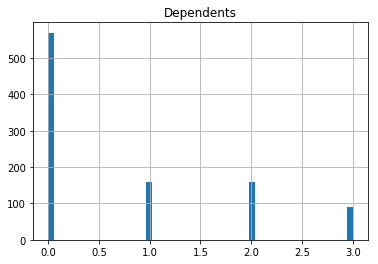

In [68]:
dataf.hist(column='Dependents', bins=50)

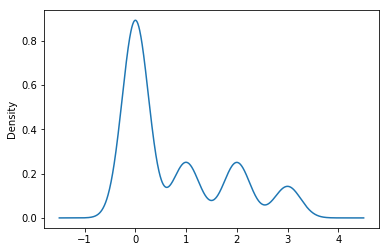

In [69]:
dataf['Dependents'].plot.density()

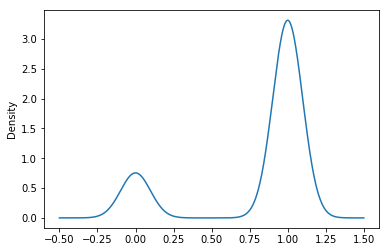

In [70]:
dataf['Gender'].plot.density()

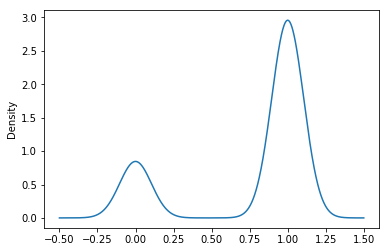

In [71]:
dataf['Education'].plot.density()

In [72]:
data_column_category = dataf.select_dtypes(exclude=[np.number]).columns

In [73]:
data_column_Integer = dataf.columns.difference(data_column_category)

In [74]:
dataf[data_column_category].nunique()

Loan_ID    981
source       2
dtype: int64

In [75]:
dataf_one_hot = pd.get_dummies(dataf[data_column_category].drop(columns = "Loan_ID"))

In [76]:
data_model = pd.concat([dataf_one_hot,dataf["Loan_ID"],dataf[data_column_Integer]],axis=1)

In [77]:
data_model.shape

(981, 15)

In [78]:
train_modified = data_model.loc[data_model.source_train==1.0,:]

In [79]:
test_modified = data_model.loc[data_model.source_train==0.0,:]

In [80]:
test_modified.shape

(367, 15)

In [81]:
train_modified.shape

(614, 15)

In [82]:
test_modified.columns

Index([u'source_test', u'source_train', u'Loan_ID', u'ApplicantIncome',
       u'CoapplicantIncome', u'Credit_History', u'Dependents', u'Education',
       u'Gender', u'LoanAmount', u'Loan_Amount_Term', u'Loan_Status',
       u'Married', u'Property_Area', u'Self_Employed'],
      dtype='object')

In [83]:
test_modified.drop(columns=['source_train','source_test','Loan_Status'],inplace=True)

In [84]:
test_modified.shape

(367, 12)

In [85]:
train_modified.drop(columns=['source_train','source_test'],inplace=True)

In [86]:
train_modified.shape

(614, 13)

In [87]:
train_modified.to_csv("train_ready_for_model.csv",index=False)

In [88]:
test_modified.to_csv("test_ready_for_model.csv",index=False)

In [89]:
##Modeling